In [ ]:
! git clone https://github.com/PaulaBergamasco/Random

Cloning into 'Random'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

arbol_cv=cv2.imread('/content/Random/arbol-mas.jpg')
arbol = arbol_cv.copy()
arbol[:,:,[2,1,0]]=arbol_cv #De BGR a RGB

In [ ]:
#mariposa_cv =cv2.imread('/content/Random/Mariposa.jpg')
#mariposa = mariposa_cv.copy()
#mariposa[:,:,[2,1,0]]=mariposa_cv #De BGR a RGB

In [ ]:
cubo_cv=cv2.imread('/content/Random/Cubo2.jpg')
cubo = cubo_cv.copy()
cubo[:,:,[2,1,0]]=cubo_cv #De BGR a RGB

In [ ]:
# flor_cv=cv2.imread('/content/Random/Flor.jpg')
# flor = flor_cv.copy()
# flor[:,:,[2,1,0]]=flor_cv #De BGR a RGB

### Modificacion YIQ

La propuesta para esta actividad consiste en manipular independientemente la
luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una
nueva imagen.

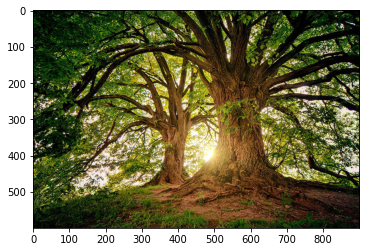

In [ ]:
#imagen original arbol
plt.imshow(arbol)
plt.show()

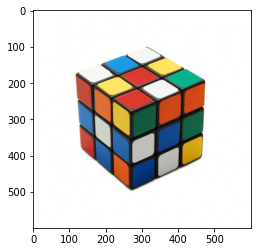

In [ ]:
#imagen original cubo
plt.imshow(cubo)
plt.show()

In [ ]:
#normalizamos la imagen arbol
norm_image_arbol = cv2.normalize(arbol, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_image_arbol.max()

1.0

In [ ]:
#normalizamos la imagen cubo
norm_image_cubo = cv2.normalize(cubo, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_image_cubo.max()

1.0

In [ ]:
Matriz_yiq= np.array([[0.299, 0.587, 0.114], [0.596, -0.274, -0.322], [0.211, -0.523, 0.312]])
Matriz_yiq

array([[ 0.299,  0.587,  0.114],
       [ 0.596, -0.274, -0.322],
       [ 0.211, -0.523,  0.312]])

In [ ]:
Matriz_rgb= np.array([[1.0, 0.956, 0.621], [1.0, -0.272, -0.647], [1.0, -1.106, 1.703]])
Matriz_rgb

array([[ 1.   ,  0.956,  0.621],
       [ 1.   , -0.272, -0.647],
       [ 1.   , -1.106,  1.703]])

In [ ]:
#pasamos la matriz rgb a YIQ
yiq_array_arbol= np.dot(norm_image_arbol, Matriz_yiq.T.copy())
yiq_array_cubo= np.dot(norm_image_cubo, Matriz_yiq.T.copy())


In [ ]:
from IPython.display import display
import ipywidgets as widgets
alpha = widgets.FloatSlider(
    value=1.2,
    min=1.2,
    max=5,
    step=0.2,
    description='Alpha:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
display(alpha)

FloatSlider(value=1.2, continuous_update=False, description='Alpha:', max=5.0, min=1.2, readout_format='.1f', …

In [ ]:
alpha.value

1.2

In [ ]:
#multiplico el canal y por un alpha>1
yiq_array_aumento_y_arbol=yiq_array_arbol.copy()
yiq_array_aumento_y_arbol[:, :, 0] = yiq_array_aumento_y_arbol[:,:,0]*alpha.value

#guardo las dimensiones de la imagen
width_arbol, height_arbol,chanel=yiq_array_aumento_y_arbol.shape
l=0
for j in range( width_arbol):
  for k in range(height_arbol):
    y = yiq_array_aumento_y_arbol.item(j, k,0)
    if y>1:
      yiq_array_aumento_y_arbol[j, k, 0] = 1
      l=l+1
print('cantidad de pixeles y truncados a 1 ',l)
#chequeo que no haya valores de y mayores a 1

print('valor maximo de y ',yiq_array_aumento_y_arbol[:,:,0].max())
rgb_array_alpha_high_arbol= np.dot(yiq_array_aumento_y_arbol, Matriz_rgb.T.copy())


cantidad de pixeles y truncados a 1  85185
valor maximo de y  1.0


In [ ]:
#multiplico el canal y por un alpha>1
yiq_array_aumento_y_cubo=yiq_array_cubo.copy()
yiq_array_aumento_y_cubo[:, :, 0] = yiq_array_aumento_y_cubo[:,:,0]*alpha.value

#guardo las dimensiones de la imagen
width_cubo, height_cubo,chanel=yiq_array_aumento_y_cubo.shape
l=0
for j in range( width_cubo):
  for k in range(height_cubo):
    y = yiq_array_aumento_y_cubo.item(j, k,0)
    if y>1:
      yiq_array_aumento_y_cubo[j, k, 0] = 1
      l=l+1
print('cantidad de pixeles y truncados a 1 ',l)
#chequeo que no haya valores de y mayores a 1

print('valor maximo de y ',yiq_array_aumento_y_cubo[:,:,0].max())
rgb_array_alpha_high_cubo= np.dot(yiq_array_aumento_y_cubo, Matriz_rgb.T.copy())

cantidad de pixeles y truncados a 1  283341
valor maximo de y  1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


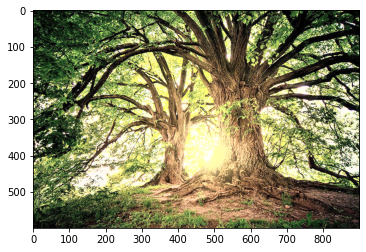

In [ ]:
plt.imshow(rgb_array_alpha_high_arbol)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


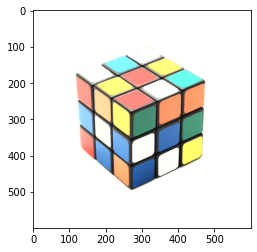

In [ ]:
plt.imshow(rgb_array_alpha_high_cubo)
plt.show()

Vemos como aumenta las luminancias de las imagenes sin alterar la saturacion y crominancia. 

In [ ]:
alpha_low = widgets.FloatSlider(
    value=0.9,
    min=0,
    max=0.9,
    step=0.1,
    description='Alpha_low:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
display(alpha_low)

FloatSlider(value=0.9, description='Alpha_low:', max=0.9, readout_format='.1f')

In [ ]:
alpha_low.value

0.9

In [ ]:
#multiplico el canal Y por un alpha< 1
yiq_array_disminucion_y_arbol=yiq_array_arbol.copy()
yiq_array_disminucion_y_arbol[:, :, 0] = yiq_array_disminucion_y_arbol[:,:,0]*alpha_low.value

#chequeo que no haya valores por encima de 1
l=0
for j in range( width_arbol):
  for k in range(height_arbol):
    y = yiq_array_disminucion_y_arbol.item(j, k,0)
    if y>1:
      yiq_array_disminucion_y_arbol[j, k, 0] = 1
      l=l+1
    #im_rgb.putpixel((x, y), (b, g, r))
print('cantidad de pixeles y truncados a 1 ',l)
print('valor maximo de y ',yiq_array_disminucion_y_arbol[:,:,0].max())

rgb_array_alpha_low_arbol= np.dot(yiq_array_disminucion_y_arbol, Matriz_rgb.T.copy())


cantidad de pixeles y truncados a 1  0
valor maximo de y  0.49999999999999994


In [ ]:
#multiplico el canal Y por un alpha< 1
yiq_array_disminucion_y_cubo=yiq_array_cubo.copy()
yiq_array_disminucion_y_cubo[:, :, 0] = yiq_array_disminucion_y_cubo[:,:,0]*alpha_low.value

#chequeo que no haya valores por encima de 1
l=0
for j in range( width_cubo):
  for k in range(height_cubo):
    y = yiq_array_disminucion_y_cubo.item(j, k,0)
    if y>1:
      yiq_array_disminucion_y_cubo[j, k, 0] = 1
      l=l+1
    #im_rgb.putpixel((x, y), (b, g, r))
print('cantidad de pixeles y truncados a 1 ',l)
print('valor maximo de y ',yiq_array_disminucion_y_cubo[:,:,0].max())

rgb_array_alpha_low_cubo= np.dot(yiq_array_disminucion_y_cubo, Matriz_rgb.T.copy())

cantidad de pixeles y truncados a 1  0
valor maximo de y  0.49999999999999994


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


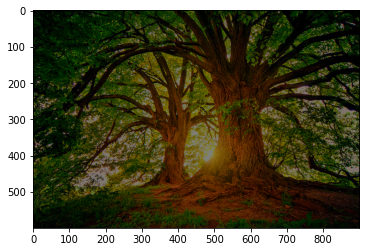

In [ ]:
plt.imshow(rgb_array_alpha_low_arbol)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


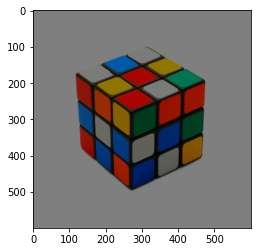

In [ ]:
plt.imshow(rgb_array_alpha_low_cubo)
plt.show()

Vemos como disminuyen las luminancias de las imagenes sin alterar la saturacion y crominancia.

In [ ]:
beta_high = widgets.FloatSlider(
    value=1.2,
    min=1.2,
    max=5,
    step=0.2,
    description='Beta_high:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
display(beta_high)

FloatSlider(value=1.2, continuous_update=False, description='Beta_high:', max=5.0, min=1.2, readout_format='.1…

In [ ]:
#multiplico el canal I,Q  por un beta>1

yiq_array_aumento_iq_arbol=yiq_array_arbol.copy()
yiq_array_aumento_iq_arbol[:, :, 1] = yiq_array_aumento_iq_arbol[:,:,1]*beta_high.value
yiq_array_aumento_iq_arbol[:, :, 2] = yiq_array_aumento_iq_arbol[:,:,2]*beta_high.value

#chequeo que no haya valores de I por fuera de +0.5957 y -0.5957, ni valores de q por fuera de +0.5226 y -0.5226
l=0
m=0
for j in range( width_arbol):
  for k in range(height_arbol):
    i = yiq_array_aumento_iq_arbol.item(j, k,1)
    if i>0.5957:
      yiq_array_aumento_iq_arbol[j, k, 1] = 0.5957
      l=l+1
    if i<-0.5957:
      yiq_array_aumento_iq_arbol[j, k, 1] = -0.5957
      l=l+1
    q = yiq_array_aumento_iq_arbol.item(j, k,2)
    if q>0.5226:
      yiq_array_aumento_iq_arbol[j, k, 2] = 0.5226
      m=m+1
    if q<-0.5226:
      yiq_array_aumento_iq_arbol[j, k, 2] = -0.5226
      m=m+1
    
    
print('cantidad de pixeles I truncados ',l)
print('valor maximo de I ',yiq_array_aumento_iq_arbol[:,:,1].max())
print('valor minimo de I ',yiq_array_aumento_iq_arbol[:,:,1].min())
print()

print('cantidad de pixeles Q truncados ',m)
print('valor maximo de Q ',yiq_array_aumento_iq_arbol[:,:,2].max())
print('valor minimo de Q ',yiq_array_aumento_iq_arbol[:,:,2].min())

rgb_array_beta_high_arbol= np.dot(yiq_array_aumento_iq_arbol, Matriz_rgb.T.copy())

cantidad de pixeles I truncados  58
valor maximo de I  0.5957
valor minimo de I  -0.5713411983668805

cantidad de pixeles Q truncados  2
valor maximo de Q  0.3271129470258951
valor minimo de Q  -0.5226


In [ ]:
#multiplico el canal I,Q  por un beta>1

yiq_array_aumento_iq_cubo=yiq_array_cubo.copy()
yiq_array_aumento_iq_cubo[:, :, 1] = yiq_array_aumento_iq_cubo[:,:,1]*beta_high.value
yiq_array_aumento_iq_cubo[:, :, 2] = yiq_array_aumento_iq_cubo[:,:,2]*beta_high.value

#chequeo que no haya valores de I por fuera de +0.5957 y -0.5957, ni valores de q por fuera de +0.5226 y -0.5226
l=0
m=0
for j in range( width_cubo):
  for k in range(height_cubo):
    i = yiq_array_aumento_iq_cubo.item(j, k,1)
    if i>0.5957:
      yiq_array_aumento_iq_cubo[j, k, 1] = 0.5957
      l=l+1
    if i<-0.5957:
      yiq_array_aumento_iq_cubo[j, k, 1] = -0.5957
      l=l+1
    q = yiq_array_aumento_iq_cubo.item(j, k,2)
    if q>0.5226:
      yiq_array_aumento_iq_cubo[j, k, 2] = 0.5226
      m=m+1
    if q<-0.5226:
      yiq_array_aumento_iq_cubo[j, k, 2] = -0.5226
      m=m+1
    
    
print('cantidad de pixeles I truncados ',l)
print('valor maximo de I ',yiq_array_aumento_iq_cubo[:,:,1].max())
print('valor minimo de I ',yiq_array_aumento_iq_cubo[:,:,1].min())
print()

print('cantidad de pixeles Q truncados ',m)
print('valor maximo de Q ',yiq_array_aumento_iq_cubo[:,:,2].max())
print('valor minimo de Q ',yiq_array_aumento_iq_cubo[:,:,2].min())

rgb_array_beta_high_cubo= np.dot(yiq_array_aumento_iq_cubo, Matriz_rgb.T.copy())

cantidad de pixeles I truncados  20125
valor maximo de I  0.5957
valor minimo de I  -0.5957

cantidad de pixeles Q truncados  0
valor maximo de Q  0.2711364800155162
valor minimo de Q  -0.3914894107142464


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


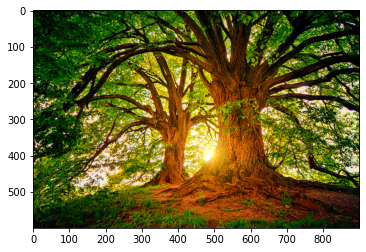

In [ ]:
plt.imshow(rgb_array_beta_high_arbol)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


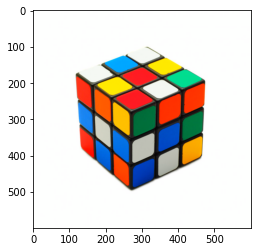

In [ ]:
plt.imshow(rgb_array_beta_high_cubo)
plt.show()

Vemos como aumenta la saturacion y crominancia de las imagenes sin alterar las luminancias 

In [ ]:
beta_low = widgets.FloatSlider(
    value=0.9,
    min=0,
    max=0.9,
    step=0.1,
    description='Beta_low:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
display(beta_low)

FloatSlider(value=0.9, continuous_update=False, description='Beta_low:', max=0.9, readout_format='.1f')

In [ ]:
#multiplico el canal I,Q  por un beta=0.5

yiq_array_disminucion_iq_arbol=yiq_array_arbol.copy()
yiq_array_disminucion_iq_arbol[:, :, 1] = yiq_array_disminucion_iq_arbol[:,:,1]*beta_low.value
yiq_array_disminucion_iq_arbol[:, :, 2] = yiq_array_disminucion_iq_arbol[:,:,2]*beta_low.value

#chequeo que no haya valores de I por fuera de +0.5957 y -0.5957, ni valores de q por fuera de +0.5226 y -0.5226
l=0
m=0
for j in range( width_arbol):
  for k in range(height_arbol):
    i = yiq_array_disminucion_iq_arbol.item(j, k,1)
    if i>0.5957:
      yiq_array_disminucion_iq_arbol[j, k, 1] = 0.5957
      l=l+1
    if i<-0.5957:
      yiq_array_disminucion_iq_arbol[j, k, 1] = -0.5957
      l=l+1
    q = yiq_array_disminucion_iq_arbol.item(j, k,2)
    if q>0.5226:
      yiq_array_disminucion_iq_arbol[j, k, 2] = 0.5226
      m=m+1
    if q<-0.5226:
      yiq_array_disminucion_iq_arbol[j, k, 2] = -0.5226
      m=m+1
    
    
print('cantidad de pixeles I truncados ',l)
print('valor maximo de I ',yiq_array_disminucion_iq_arbol[:,:,1].max())
print('valor minimo de I ',yiq_array_disminucion_iq_arbol[:,:,1].min())
print()

print('cantidad de pixeles Q truncados ',m)
print('valor maximo de Q ',yiq_array_disminucion_iq_arbol[:,:,2].max())
print('valor minimo de Q ',yiq_array_disminucion_iq_arbol[:,:,2].min())

rgb_array_beta_low_arbol= np.dot(yiq_array_disminucion_iq_arbol, Matriz_rgb.T.copy())

cantidad de pixeles I truncados  0
valor maximo de I  0.18121412861272693
valor minimo de I  -0.12696471074819568

cantidad de pixeles Q truncados  0
valor maximo de Q  0.07269176600575447
valor minimo de Q  -0.12474824770838025


In [ ]:
#multiplico el canal I,Q  por un beta=0.5

yiq_array_disminucion_iq_cubo=yiq_array_cubo.copy()
yiq_array_disminucion_iq_cubo[:, :, 1] = yiq_array_disminucion_iq_cubo[:,:,1]*beta_low.value
yiq_array_disminucion_iq_cubo[:, :, 2] = yiq_array_disminucion_iq_cubo[:,:,2]*beta_low.value

#chequeo que no haya valores de I por fuera de +0.5957 y -0.5957, ni valores de q por fuera de +0.5226 y -0.5226
l=0
m=0
for j in range( width_cubo):
  for k in range(height_cubo):
    i = yiq_array_disminucion_iq_cubo.item(j, k,1)
    if i>0.5957:
      yiq_array_disminucion_iq_cubo[j, k, 1] = 0.5957
      l=l+1
    if i<-0.5957:
      yiq_array_disminucion_iq_cubo[j, k, 1] = -0.5957
      l=l+1
    q = yiq_array_disminucion_iq_cubo.item(j, k,2)
    if q>0.5226:
      yiq_array_disminucion_iq_cubo[j, k, 2] = 0.5226
      m=m+1
    if q<-0.5226:
      yiq_array_disminucion_iq_cubo[j, k, 2] = -0.5226
      m=m+1
    
    
print('cantidad de pixeles I truncados ',l)
print('valor maximo de I ',yiq_array_disminucion_iq_cubo[:,:,1].max())
print('valor minimo de I ',yiq_array_disminucion_iq_cubo[:,:,1].min())
print()

print('cantidad de pixeles Q truncados ',m)
print('valor maximo de Q ',yiq_array_disminucion_iq_cubo[:,:,2].max())
print('valor minimo de Q ',yiq_array_disminucion_iq_cubo[:,:,2].min())

rgb_array_beta_low_cubo= np.dot(yiq_array_disminucion_iq_cubo, Matriz_rgb.T.copy())

cantidad de pixeles I truncados  0
valor maximo de I  0.177945112106204
valor minimo de I  -0.17058510798215867

cantidad de pixeles Q truncados  0
valor maximo de Q  0.06025255111455916
valor minimo de Q  -0.08699764682538809


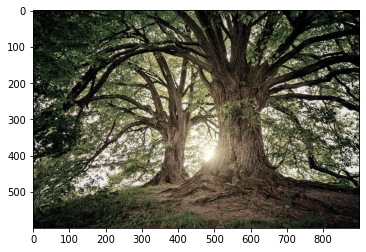

In [ ]:
plt.imshow(rgb_array_beta_low_arbol)
plt.show()

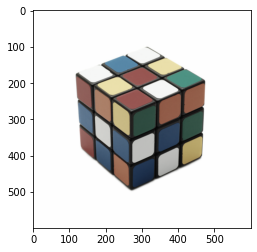

In [ ]:
plt.imshow(rgb_array_beta_low_cubo)
plt.show()

Vemos como disminuye la saturacion y crominancia de las imagenes sin alterar las luminancias 

### Modificacion de histograma
Desarrollar un aplicativo que pueda abrir una imagen, manipule su
histograma de luminancias, y luego ver la imagen procesada. Se debe
poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más
cómodo.

(array([51087., 37178., 34832., 33693., 31915., 30780., 29558., 28272.,
        26425., 24951., 22971., 21152., 18962., 16811., 14633., 12822.,
        11262.,  9712.,  8470.,  7681.,  7003.,  6310.,  5805.,  5522.,
         5063.,  5025.,  4608.,  4530.,  4899.,  5655.,  6110.,  6303.]),
 array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
        0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
        0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
        0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
        0.875  , 0.90625, 0.9375 , 0.96875, 1.     ]),
 <a list of 32 Patch objects>)

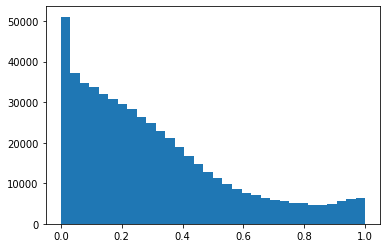

In [ ]:
#histograma de los valores de luminancia Y
plt.hist(yiq_array_arbol[:,:,0].ravel(),32,[0,1])

(array([   567.,   2355.,   3584.,   4759.,   5112.,   4008.,   3079.,
          4003.,   7555.,   2752.,   2417.,   3634.,   3228.,  15152.,
          4311.,   6250.,   1251.,   2793.,    725.,   1020.,   1669.,
           966.,   2035.,   6605.,    519.,   1018.,   1746.,   4886.,
           577.,    457.,   4070., 256897.]),
 array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
        0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
        0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
        0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
        0.875  , 0.90625, 0.9375 , 0.96875, 1.     ]),
 <a list of 32 Patch objects>)

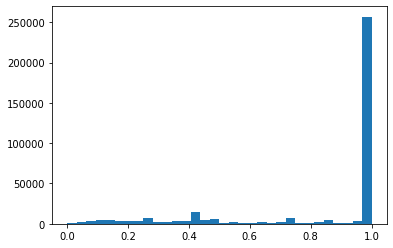

In [ ]:
#histograma de los valores de luminancia Y
plt.hist(yiq_array_cubo[:,:,0].ravel(),32,[0,1])

valor maximo de y  0.9999999999999999


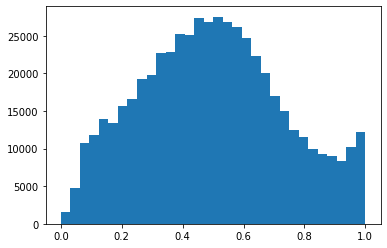

In [ ]:
#cambio el histograma con la raiz cuadrada: aclara la imagen
yiq_array_histograma_sqrt_arbol=yiq_array_arbol.copy()
yiq_array_histograma_sqrt_arbol[:, :, 0] = np.sqrt(yiq_array_histograma_sqrt_arbol[:,:,0])

print('valor maximo de y ',yiq_array_histograma_sqrt_arbol[:,:,0].max())

plt.hist(yiq_array_histograma_sqrt_arbol[:,:,0].ravel(),32,[0,1])

rgb_array_sqrt_arbol= np.dot(yiq_array_histograma_sqrt_arbol, Matriz_rgb.T.copy())


valor maximo de y  0.9999999999999999


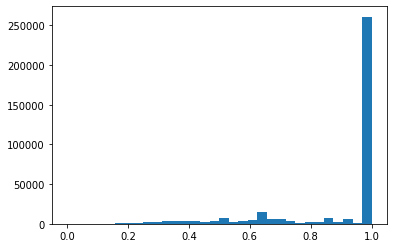

In [ ]:
#cambio el histograma con la raiz cuadrada: aclara la imagen
yiq_array_histograma_sqrt_cubo=yiq_array_cubo.copy()
yiq_array_histograma_sqrt_cubo[:, :, 0] = np.sqrt(yiq_array_histograma_sqrt_cubo[:,:,0])

print('valor maximo de y ',yiq_array_histograma_sqrt_cubo[:,:,0].max())

plt.hist(yiq_array_histograma_sqrt_cubo[:,:,0].ravel(),32,[0,1])

rgb_array_sqrt_cubo= np.dot(yiq_array_histograma_sqrt_cubo, Matriz_rgb.T.copy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


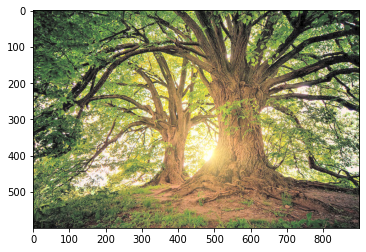

In [ ]:
plt.imshow(rgb_array_sqrt_arbol)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


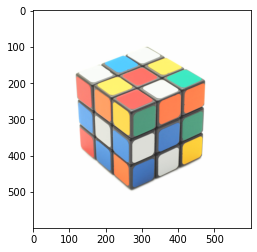

In [ ]:
plt.imshow(rgb_array_sqrt_cubo)
plt.show()

Los histogramas con el filtro de raiz hace que aumente la luminancia de una manera mas gradual sin coercionar a 1.

valor maximo de y  0.9999999999999998


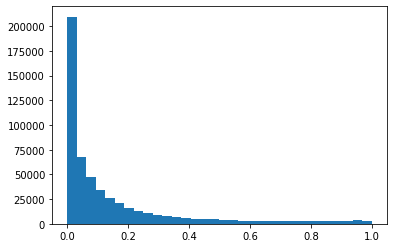

In [ ]:
#cambio el histograma con la potencia: oscurece la imagen
yiq_array_histograma_pot_arbol=yiq_array_arbol.copy()
yiq_array_histograma_pot_arbol[:, :, 0] = yiq_array_histograma_pot_arbol[:,:,0]*yiq_array_histograma_pot_arbol[:,:,0]

print('valor maximo de y ',yiq_array_histograma_pot_arbol[:,:,0].max())

plt.hist(yiq_array_histograma_pot_arbol[:,:,0].ravel(),32,[0,1])

rgb_array_pot_arbol= np.dot(yiq_array_histograma_pot_arbol, Matriz_rgb.T.copy())


valor maximo de y  0.9999999999999998


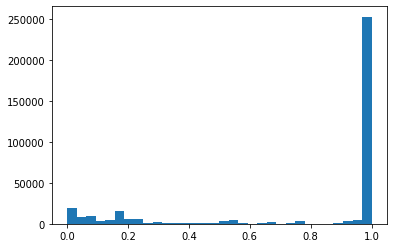

In [ ]:
#cambio el histograma con la potencia: oscurece la imagen
yiq_array_histograma_pot_cubo=yiq_array_cubo.copy()
yiq_array_histograma_pot_cubo[:, :, 0] = yiq_array_histograma_pot_cubo[:,:,0]*yiq_array_histograma_pot_cubo[:,:,0]

print('valor maximo de y ',yiq_array_histograma_pot_cubo[:,:,0].max())

plt.hist(yiq_array_histograma_pot_cubo[:,:,0].ravel(),32,[0,1])

rgb_array_pot_cubo= np.dot(yiq_array_histograma_pot_cubo, Matriz_rgb.T.copy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


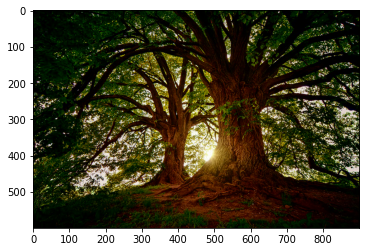

In [ ]:
plt.imshow(rgb_array_pot_arbol)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


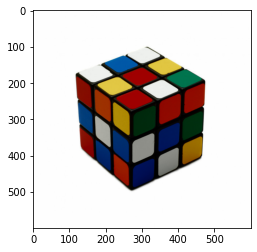

In [ ]:
plt.imshow(rgb_array_pot_cubo)
plt.show()

Los histogramas con el filtro de potencia en cambio hace que disminuya la luminancia de una manera mas gradual sin coercionar a 0.

In [ ]:
y_max_threshold = widgets.FloatSlider(
    value=0.8,
    min=0.5,
    max=1,
    step=0.1,
    description='y_max:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
y_min_threshold = widgets.FloatSlider(
    value=0.2,
    min=0,
    max=0.5,
    step=0.1,
    description='y_min:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
display(y_max_threshold)
display(y_min_threshold)

FloatSlider(value=0.8, continuous_update=False, description='y_max:', max=1.0, min=0.5, readout_format='.1f')

FloatSlider(value=0.2, continuous_update=False, description='y_min:', max=0.5, readout_format='.1f')

cantidad de pixeles y truncados a 1  34192
cantidad de pixeles y truncados a 0  231774


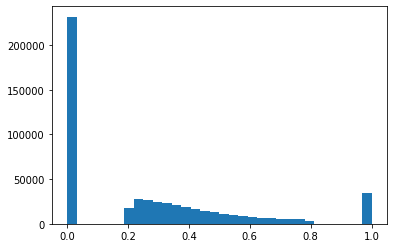

In [ ]:
#lineal a trozos aumenta el contraste de la imagen
yiq_array_histograma_lineal_arbol=yiq_array_arbol.copy()
#yiq_array_histograma_lineal[:, :, 0] = yiq_array_histograma_lineal[:,:,0]*yiq_array_histograma_pot[:,:,0]

#chequeo que no haya valores por encima de 1
l=0
m=0
#threshold inferior y superiro
y_min=y_min_threshold.value
y_max=y_max_threshold.value
for j in range( width_arbol):
  for k in range(height_arbol):
    y = yiq_array_histograma_lineal_arbol.item(j, k,0)
    if y>y_max:
      yiq_array_histograma_lineal_arbol[j, k, 0] = 1
      l=l+1
    elif y<y_min:
      yiq_array_histograma_lineal_arbol[j, k, 0] = 0
      m=m+1
    else:
      #interpolacion
      np.interp(y, [y_min,y_max], [0,1])

    #im_rgb.putpixel((x, y), (b, g, r))
print('cantidad de pixeles y truncados a 1 ',l)
print('cantidad de pixeles y truncados a 0 ',m)

#print('valor maximo de y ',yiq_array_histograma_pot[:,:,0].max())

plt.hist(yiq_array_histograma_lineal_arbol[:,:,0].ravel(),32,[0,1])

rgb_array_lineal_arbol= np.dot(yiq_array_histograma_lineal_arbol, Matriz_rgb.T.copy())

cantidad de pixeles y truncados a 1  269429
cantidad de pixeles y truncados a 0  22044


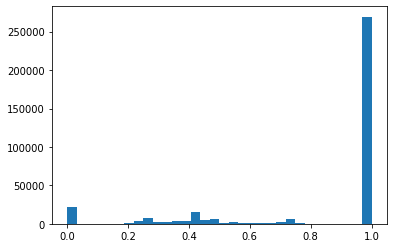

In [ ]:
#lineal a trozos aumenta el contraste de la imagen
yiq_array_histograma_lineal_cubo=yiq_array_cubo.copy()
#yiq_array_histograma_lineal[:, :, 0] = yiq_array_histograma_lineal[:,:,0]*yiq_array_histograma_pot[:,:,0]

#chequeo que no haya valores por encima de 1
l=0
m=0
#threshold inferior y superiro
y_min=y_min_threshold.value
y_max=y_max_threshold.value
for j in range( width_cubo):
  for k in range(height_cubo):
    y = yiq_array_histograma_lineal_cubo.item(j, k,0)
    if y>y_max:
      yiq_array_histograma_lineal_cubo[j, k, 0] = 1
      l=l+1
    elif y<y_min:
      yiq_array_histograma_lineal_cubo[j, k, 0] = 0
      m=m+1
    else:
      #interpolacion
      np.interp(y, [y_min,y_max], [0,1])

    #im_rgb.putpixel((x, y), (b, g, r))
print('cantidad de pixeles y truncados a 1 ',l)
print('cantidad de pixeles y truncados a 0 ',m)

#print('valor maximo de y ',yiq_array_histograma_pot[:,:,0].max())

plt.hist(yiq_array_histograma_lineal_cubo[:,:,0].ravel(),32,[0,1])

rgb_array_lineal_cubo= np.dot(yiq_array_histograma_lineal_cubo, Matriz_rgb.T.copy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


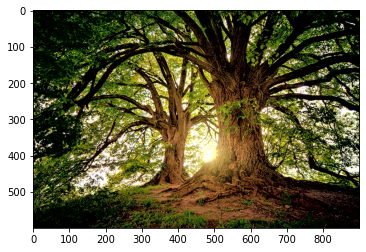

In [ ]:
plt.imshow(rgb_array_lineal_arbol)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


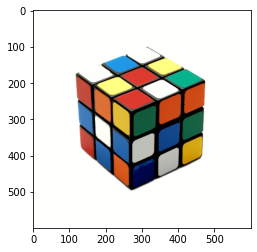

In [ ]:
plt.imshow(rgb_array_lineal_cubo)
plt.show()

Los histogramas con el filtro lineal a trozos hace que aumente la luminancia apartir de un umbral sin coercionar a 1 y disminuya a partir de otro umbral aumentando el contraste haciendola mas nitida.

## Resumen de resultados

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


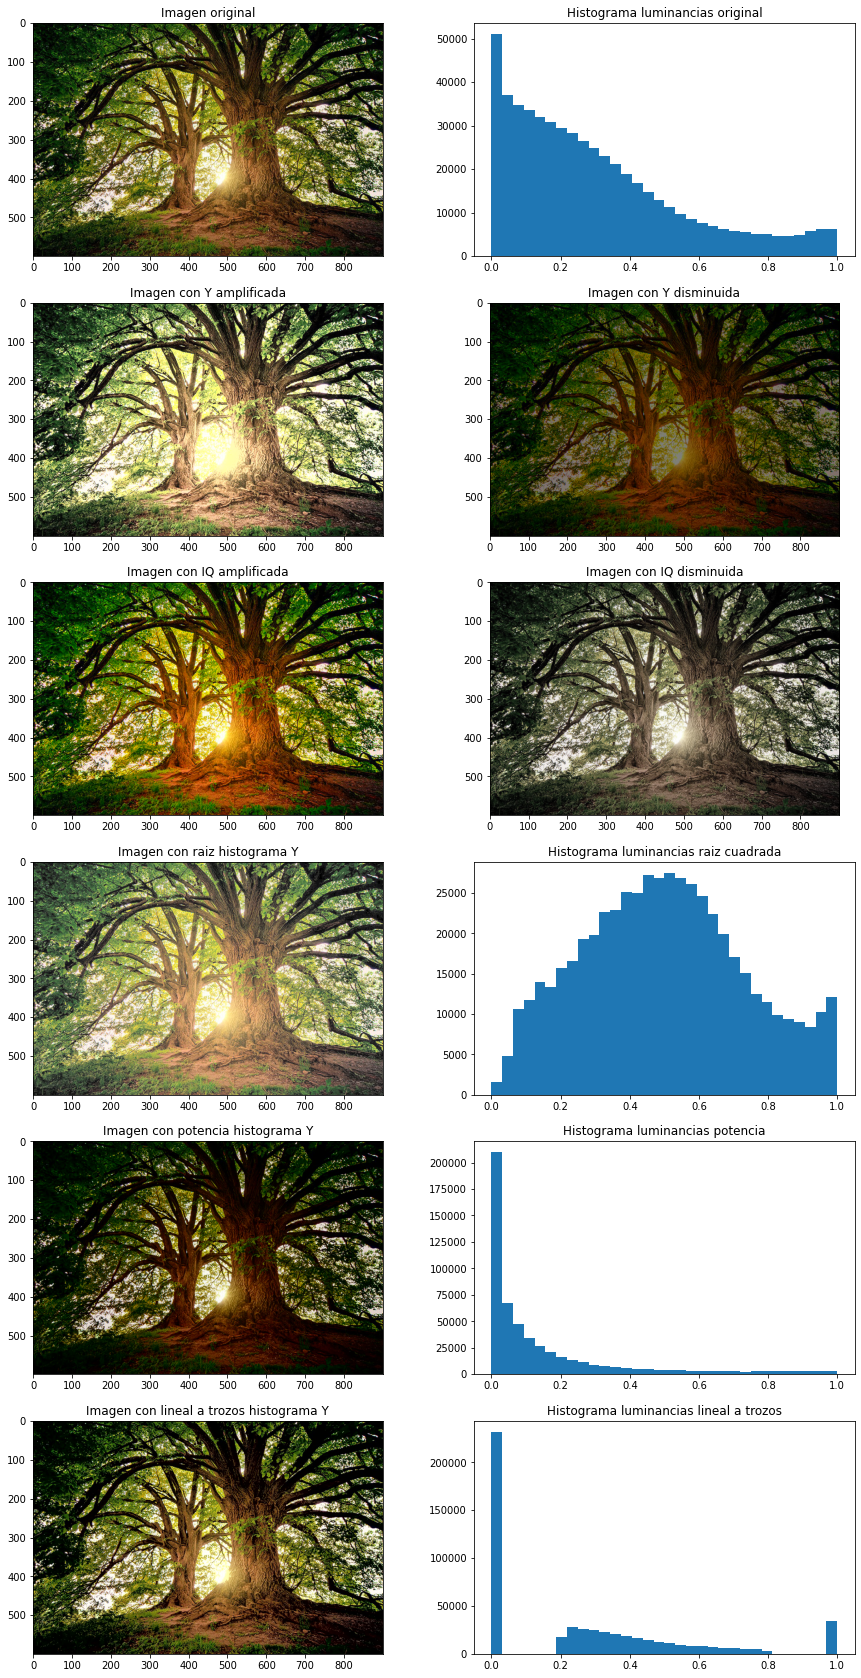

In [ ]:

fig = plt.gcf()
fig.set_size_inches(15, 30)
plt.subplot(6,2,1),plt.imshow(arbol,cmap='gray'),plt.title('Imagen original')
plt.subplot(6,2,2),plt.hist(yiq_array_arbol[:,:,0].ravel(),32,[0,1]),plt.title('Histograma luminancias original')

plt.subplot(6,2,3),plt.imshow(rgb_array_alpha_high_arbol,cmap='gray'),plt.title('Imagen con Y amplificada')
plt.subplot(6,2,4),plt.imshow(rgb_array_alpha_low_arbol,cmap='gray'),plt.title('Imagen con Y disminuida')
plt.subplot(6,2,5),plt.imshow(rgb_array_beta_high_arbol,cmap='gray'),plt.title('Imagen con IQ amplificada')
plt.subplot(6,2,6),plt.imshow(rgb_array_beta_low_arbol,cmap='gray'),plt.title('Imagen con IQ disminuida')

plt.subplot(6,2,7),plt.imshow(rgb_array_sqrt_arbol,cmap='gray'),plt.title('Imagen con raiz histograma Y')
plt.subplot(6,2,8),plt.hist(yiq_array_histograma_sqrt_arbol[:,:,0].ravel(),32,[0,1]),plt.title('Histograma luminancias raiz cuadrada')

plt.subplot(6,2,9),plt.imshow(rgb_array_pot_arbol,cmap='gray'),plt.title('Imagen con potencia histograma Y')
plt.subplot(6,2,10),plt.hist(yiq_array_histograma_pot_arbol[:,:,0].ravel(),32,[0,1]),plt.title('Histograma luminancias potencia')

plt.subplot(6,2,11),plt.imshow(rgb_array_lineal_arbol,cmap='gray'),plt.title('Imagen con lineal a trozos histograma Y')
plt.subplot(6,2,12),plt.hist(yiq_array_histograma_lineal_arbol[:,:,0].ravel(),32,[0,1]),plt.title('Histograma luminancias lineal a trozos')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


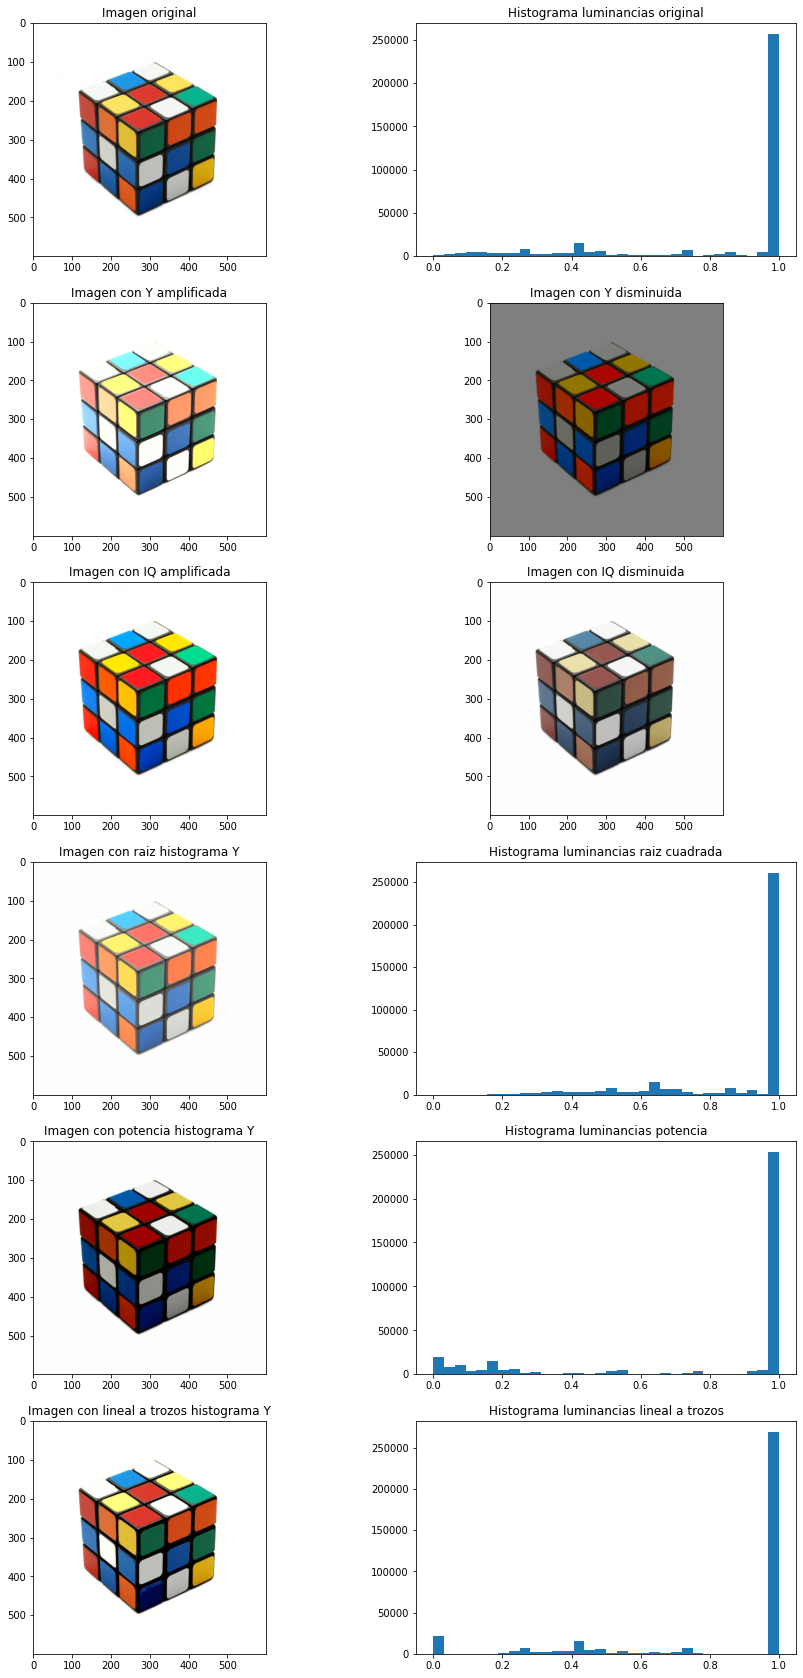

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 30)
plt.subplot(6,2,1),plt.imshow(cubo,cmap='gray'),plt.title('Imagen original')
plt.subplot(6,2,2),plt.hist(yiq_array_cubo[:,:,0].ravel(),32,[0,1]),plt.title('Histograma luminancias original')

plt.subplot(6,2,3),plt.imshow(rgb_array_alpha_high_cubo,cmap='gray'),plt.title('Imagen con Y amplificada')
plt.subplot(6,2,4),plt.imshow(rgb_array_alpha_low_cubo,cmap='gray'),plt.title('Imagen con Y disminuida')
plt.subplot(6,2,5),plt.imshow(rgb_array_beta_high_cubo,cmap='gray'),plt.title('Imagen con IQ amplificada')
plt.subplot(6,2,6),plt.imshow(rgb_array_beta_low_cubo,cmap='gray'),plt.title('Imagen con IQ disminuida')

plt.subplot(6,2,7),plt.imshow(rgb_array_sqrt_cubo,cmap='gray'),plt.title('Imagen con raiz histograma Y')
plt.subplot(6,2,8),plt.hist(yiq_array_histograma_sqrt_cubo[:,:,0].ravel(),32,[0,1]),plt.title('Histograma luminancias raiz cuadrada')

plt.subplot(6,2,9),plt.imshow(rgb_array_pot_cubo,cmap='gray'),plt.title('Imagen con potencia histograma Y')
plt.subplot(6,2,10),plt.hist(yiq_array_histograma_pot_cubo[:,:,0].ravel(),32,[0,1]),plt.title('Histograma luminancias potencia')

plt.subplot(6,2,11),plt.imshow(rgb_array_lineal_cubo,cmap='gray'),plt.title('Imagen con lineal a trozos histograma Y')
plt.subplot(6,2,12),plt.hist(yiq_array_histograma_lineal_cubo[:,:,0].ravel(),32,[0,1]),plt.title('Histograma luminancias lineal a trozos')

plt.show()